In [ ]:
!pip install qiskit-aer
!pip install pylatexenc
from qiskit import *
from qiskit.visualization import plot_histogram
from math import pi


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 53.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136818 sha256=5b7ba5f25430ffe5b6bf207c687acd9354624b80fe331bfa172c7fd5ce3ccb52
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc5

In [ ]:
from qiskit.circuit.library.standard_gates import *

In [ ]:
7 ** 2 % 15

4

In [ ]:
def _7mod15():

    circ = QuantumCircuit(8)
    circ.x(4)
    circ.cx(0,5)
    circ.cx(0,6)
    circ.cx(1,4)
    circ.cx(1,6)
    for i in range(4,8):
        circ.ccx(0,1,i)
    gate = circ.to_gate()
    gate.name = "7^x mod 15"
    return gate

In [ ]:
circ = QuantumCircuit(8,4)
#circ.h(range(4))
circ.x(1) #7^1 mod 15 = 7, 7 = 7(15), 7^2 mod 15 = 4
circ.append(_7mod15(), range(8))
circ.measure(range(4,8),range(4))
circ.draw()



┌─────────────┐            
q_0: ─────┤0            ├────────────
     ┌───┐│             │            
q_1: ┤ X ├┤1            ├────────────
     └───┘│             │            
q_2: ─────┤2            ├────────────
          │             │            
q_3: ─────┤3            ├────────────
          │  7^x mod 15 │┌─┐         
q_4: ─────┤4            ├┤M├─────────
          │             │└╥┘┌─┐      
q_5: ─────┤5            ├─╫─┤M├──────
          │             │ ║ └╥┘┌─┐   
q_6: ─────┤6            ├─╫──╫─┤M├───
          │             │ ║  ║ └╥┘┌─┐
q_7: ─────┤7            ├─╫──╫──╫─┤M├
          └─────────────┘ ║  ║  ║ └╥┘
c: 4/═════════════════════╩══╩══╩══╩═
                          0  1  2  3

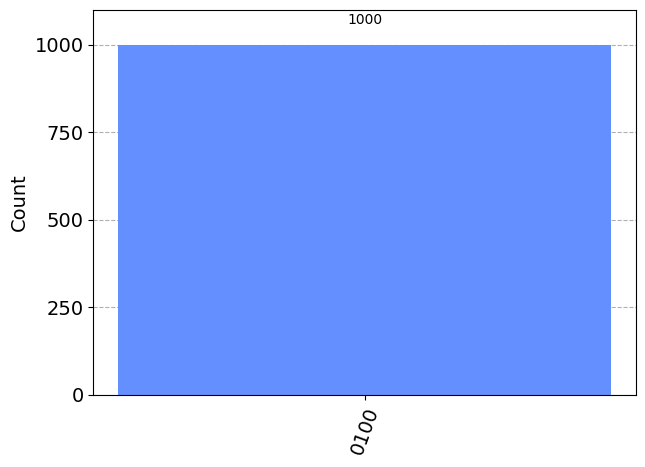

In [ ]:
backend = Aer.get_backend("qasm_simulator")
job = execute(circ, backend, shots = 1000)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

In [ ]:
def QFT(n):
    qft_circ = QuantumCircuit(n)
    for i in range(n-1, -1, -1):
        qft_circ.h(i)

        for j in range(i - 1, -1, -1):
            qft_circ.cp(pi/(2 ** (i - j)), j, i)



    for i in range(n // 2):
        qft_circ.swap(i, n - i - 1)
    gate = qft_circ.to_gate()
    gate.name = "QFT" + str(n)
    return  gate

In [ ]:
circ = QuantumCircuit(8,4)
circ.h(range(4))
circ.append(_7mod15(), range(8))
circ.measure(range(4,8),range(4))
circ.barrier(range(8))
circ.append(QFT(4), range(4))
circ.measure(range(4), range(4))
circ.draw()

┌───┐┌─────────────┐             ░ ┌───────┐┌─┐         
q_0: ┤ H ├┤0            ├─────────────░─┤0      ├┤M├─────────
     ├───┤│             │             ░ │       │└╥┘┌─┐      
q_1: ┤ H ├┤1            ├─────────────░─┤1      ├─╫─┤M├──────
     ├───┤│             │             ░ │  QFT4 │ ║ └╥┘┌─┐   
q_2: ┤ H ├┤2            ├─────────────░─┤2      ├─╫──╫─┤M├───
     ├───┤│             │             ░ │       │ ║  ║ └╥┘┌─┐
q_3: ┤ H ├┤3            ├─────────────░─┤3      ├─╫──╫──╫─┤M├
     └───┘│  7^x mod 15 │┌─┐          ░ └───────┘ ║  ║  ║ └╥┘
q_4: ─────┤4            ├┤M├──────────░───────────╫──╫──╫──╫─
          │             │└╥┘┌─┐       ░           ║  ║  ║  ║ 
q_5: ─────┤5            ├─╫─┤M├───────░───────────╫──╫──╫──╫─
          │             │ ║ └╥┘┌─┐    ░           ║  ║  ║  ║ 
q_6: ─────┤6            ├─╫──╫─┤M├────░───────────╫──╫──╫──╫─
          │             │ ║  ║ └╥┘┌─┐ ░           ║  ║  ║  ║ 
q_7: ─────┤7            ├─╫──╫──╫─┤M├─░───────────╫──╫──╫──╫─
          └─────────────┘ ║  ║  ║ └╥┘ ░           ║  ║  ║  ║ 
c: 4/═════════════════════╩══╩══╩══╩══════════════╩══╩══╩══╩═
                          0  1  2  3              0  1  2  3

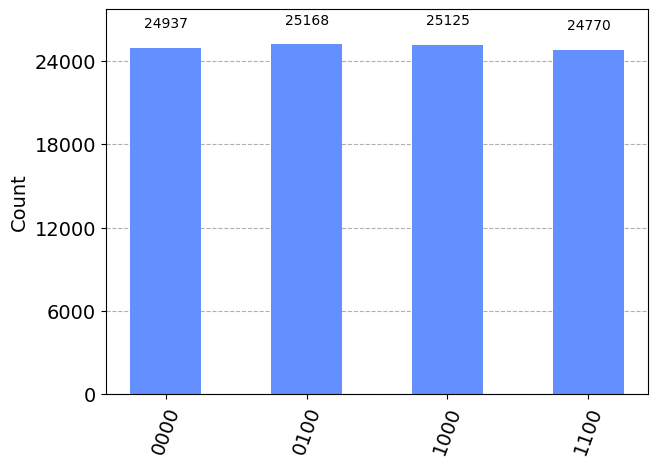

In [ ]:
backend = Aer.get_backend("qasm_simulator")
job = execute(circ, backend, shots = 100000)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

In [ ]:
# convert and add binary periods to list
for measured_value in counts:
    print(int(measured_value, 2), end='\t')

12	8	0	4	

In [ ]:
# con esto sabemos que 4 es raiz cuadrada ya que el mcd de 4 8 12 es 4
# sabiendo esto podemos calcular los factores primos de la siguiente manera:

import math

primer_factor = math.gcd(4-1, 15)
segundo_factor = math.gcd(4+1, 15)
print("factores primos:", primer_factor, segundo_factor)

factores primos: 3 5


#Con Funciones Qiskit Avanzadas

https://qiskit.org/documentation/stable/0.24/tutorials/algorithms/09_textbook_algorithms.html

https://qiskit.org/documentation/stable/0.35/tutorials/algorithms/08_factorizers.html

https://learn.qiskit.org/course/ch-algorithms/shors-algorithm

In [ ]:
import math
import numpy as np
from qiskit import Aer
from qiskit.utils import QuantumInstance
from qiskit.algorithms import Shor

<ipython-input-67-fecbcdd60b87>:5: DeprecationWarning: ``qiskit.algorithms`` has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. The ``qiskit.algorithms`` import path is deprecated as of qiskit-terra 0.25.0 and will be removed no earlier than 3 months after the release date. Please run ``pip install qiskit_algorithms`` and use ``import qiskit_algorithms`` instead.
  from qiskit.algorithms import Shor


ImportError: ignored

In [ ]:
N = 15
shor = Shor(N)
backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024)
result = shor.run(quantum_instance)
print(f"The list of factors of {N} as computed by the Shor's algorithm is {result['factors'][0]}.")

NameError: ignored

#Lo aplicamos a un algoritmo RSA

https://medium.com/qiskit/applying-shors-algorithm-bbdfd6f05f7d

In [ ]:
# imports for RSA
from numpy import gcd
from numpy.random import seed, randint
# imports for Shor
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT

“Buy 213”

At the bottom, you see what you can only assume is the coprime of an RSA key, , 15).

You know three things:

A company is going to report high earnings.
That company’s encrypted stock listing is “213,”
and the coprime of that RSA key is 15.

In [ ]:
code = 213
N = 15
print(f"You know 3 things:\n\t1. a company is going to report high earnings,",
      f"\n\t2. that company's encrypted stock listing is `{code}`, and",
      f"\n\t3. the key's coprime, N, is {N}.")


You know 3 things:
	1. a company is going to report high earnings, 
	2. that company's encrypted stock listing is `213`, and 
	3. the key's coprime, N, is 15.


RSA
The RSA (Rivest–Shamir–Adleman) cryptosystem is an algorithm which enables one group to encrypt and decrypt data while restricting another to only decrypting. This works because RSA is a special type of function referred to as an asymmetric algorithm — the mathematics required to encrypt the data is straightforward for a computer, but decrypting the data takes an unreasonably large amount of computing resources. Two distinct pieces of information are required to obtain the full range of the RSA function, a public and a private key.

In [ ]:
def rsa(P, Q):
    N = P * Q # modulus <-- the hard number to crack!

    if N % 2 == 0:
        val = P if P % 2 == 0 else Q
        raise ValueError(f"{N} can not be divisible by 2.",
                         f"{P} and {Q} are incompatible with Shor's Algorithm.")

    L = (Q - 1) * (P - 1) # number of non-common factors (1, N)

    for E in range(2, L): # between [2, L)
        if gcd(L, E) * gcd(N, E) == 1: # coprime with both L and N
            break # E is public value

    D = 1
    while True:
        if D * E % L == 1 and D != E and D != N:
            break # D is private value
        D += 1

    return ((E, N), (D, N))

def dec(code, key):
    D, N = key
    return "".join([chr(((d**D) % N) + ord('A'))
                    for d in [int(d) for d in str(code)]])

The prospect of cracking an insider trade is too compelling to ignore, so you try to guess the private key.

In [ ]:
P = Q = 0

print("Guesses:")
for i in range(0, 5, 2):
    print(f"\t{i//2 + 1}. {dec(code, (i, N))}")

Guesses:
	1. BBB
	2. EBJ
	3. BBG


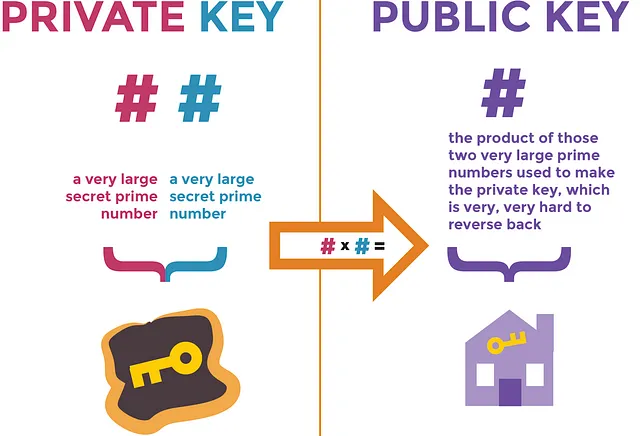

The only way to read the listing would be to

factor the coprime number,
use those factors to generate the private key,
then decrypt the listing with the private key.

Pick an integer, a, such that 1 < a < N and gcd(a, N) = 1.

In [ ]:
seed(1)

a = randint(2, N) # 1 < a < N

if gcd(a, N) == 1: # a shares no factors
    print(f"{1} < {a} < {N}, {1 < a < N}")
else: # a shares a factor
    P = gcd(a, N)
    Q = N // gcd(a, N)
    print(f"P = {P}\nQ = {Q}\n\n",
          f"{P} x {Q} = {N}, {P * Q == N}\n")
    print("You got lucky! You can skip to the Decypting 213 section, I guess. 😂")

1 < 7 < 15, True


Find the period of f(x) = a^x (mod N), where x is the function’s period

This is when you connect to your quantum computer and begin your period-finding circuit.

First, you notice the measurement qubits, |0>, are all being initialized with Hadamard (H) gates and the target qubits are being initialized at |1>.

In [ ]:
def initialize_qubits(qc, n, m):
    qc.h(range(n)) # apply hadamard gates
    qc.x(n+m-1) # set qubit to 1

In [ ]:
print(f"Which in your case is\n\tU(x) = a^x mod {N}")
def a_x_mod15(a, x):
    if a not in [2,7,8,11,13]:
        raise ValueError("'a' must be 2,7,8,11 or 13")
    U = QuantumCircuit(4)
    for iteration in range(x):
        if a in [2,13]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
        if a in [7,8]:
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if a == 11:
            U.swap(1,3)
            U.swap(0,2)
        if a in [7,11,13]:
            for q in range(4):
                U.x(q)
    U = U.to_gate()
    U.name = f"U({x})"
    c_U = U.control()
    return c_U
def modular_exponentiation(qc, n, m, a):
    for x in range(n):
        exponent = 2**x
        qc.append(a_x_mod15(a, exponent),
                     [x] + list(range(n, n+m)))

Which in your case is
	U(x) = a^x mod 15


In [ ]:
def apply_iqft(qc, measurement_qubits):
    qc.append(QFT(len(measurement_qubits),
                             do_swaps=False).inverse(),
                         measurement_qubits)

In [ ]:
def measure(qc, n):
    qc.measure(n, n)

In [ ]:
def period_finder(n, m, a):

    # set up quantum circuit
    qc = QuantumCircuit(n+m, n)

    # initialize the qubits
    initialize_qubits(qc, n, m)
    qc.barrier()

    # apply modular exponentiation
    modular_exponentiation(qc, n, m, a)
    qc.barrier()

    # apply inverse QFT
    apply_iqft(qc, range(n))
    qc.barrier()

    # measure the n measurement qubits
    measure(qc, range(n))

    return qc

In [ ]:
n = 4; m = 4

qc = period_finder(n, m, a)
qc.draw()

┌───┐ ░                                      ░ ┌───────┐ ░ ┌─┐         
q_0: ┤ H ├─░─────■────────────────────────────────░─┤0      ├─░─┤M├─────────
     ├───┤ ░     │                                ░ │       │ ░ └╥┘┌─┐      
q_1: ┤ H ├─░─────┼────────■───────────────────────░─┤1      ├─░──╫─┤M├──────
     ├───┤ ░     │        │                       ░ │  IQFT │ ░  ║ └╥┘┌─┐   
q_2: ┤ H ├─░─────┼────────┼────────■──────────────░─┤2      ├─░──╫──╫─┤M├───
     ├───┤ ░     │        │        │              ░ │       │ ░  ║  ║ └╥┘┌─┐
q_3: ┤ H ├─░─────┼────────┼────────┼────────■─────░─┤3      ├─░──╫──╫──╫─┤M├
     └───┘ ░ ┌───┴───┐┌───┴───┐┌───┴───┐┌───┴───┐ ░ └───────┘ ░  ║  ║  ║ └╥┘
q_4: ──────░─┤0      ├┤0      ├┤0      ├┤0      ├─░───────────░──╫──╫──╫──╫─
           ░ │       ││       ││       ││       │ ░           ░  ║  ║  ║  ║ 
q_5: ──────░─┤1      ├┤1      ├┤1      ├┤1      ├─░───────────░──╫──╫──╫──╫─
           ░ │  U(1) ││  U(2) ││  U(4) ││  U(8) │ ░           ░  ║  ║  ║  ║ 
q_6: ──────░─┤2      ├┤2      ├┤2      ├┤2      ├─░───────────░──╫──╫──╫──╫─
     ┌───┐ ░ │       ││       ││       ││       │ ░           ░  ║  ║  ║  ║ 
q_7: ┤ X ├─░─┤3      ├┤3      ├┤3      ├┤3      ├─░───────────░──╫──╫──╫──╫─
     └───┘ ░ └───────┘└───────┘└───────┘└───────┘ ░           ░  ║  ║  ║  ║ 
c: 4/════════════════════════════════════════════════════════════╩══╩══╩══╩═
                                                                 0  1  2  3

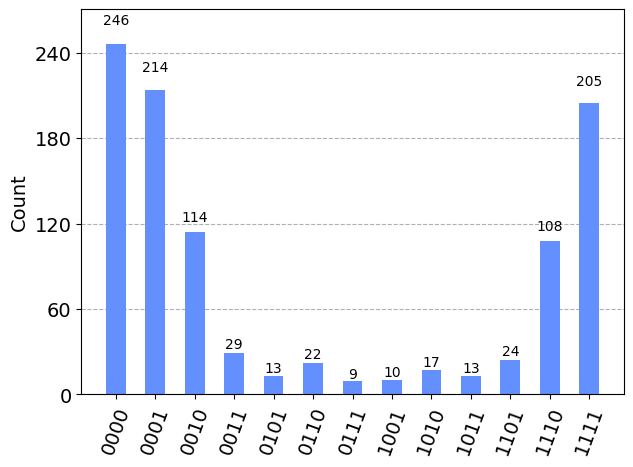

In [ ]:
simulator = Aer.get_backend('qasm_simulator')
counts = execute(qc, backend=simulator).result().get_counts(qc)

plot_histogram(counts)

In [ ]:
# convert and add binary periods to list
counts_dec = sorted([int(measured_value[::-1], 2)
                     for measured_value in counts])

print("Measured periods:", end='\t')
for measured_value in counts_dec:
    print(measured_value, end='\t')

Measured periods:	0	4	5	6	7	8	9	10	11	12	13	14	15	

the exponent, x, must be even and
a^(x/2) + 1 ≠ 0 (mod N)

In [ ]:
# convert and add binary periods to list
counts_dec = sorted([int(measured_value[::-1], 2)
                     for measured_value in counts])

print("Measured periods:", end='\t')
for measured_value in counts_dec:
    print(measured_value, end='\t')

Measured periods:	0	4	5	6	7	8	9	10	11	12	13	14	15	

Using an applicable period, x, you can find nontrivial factors, P and Q , of N with gcd(a^(x/2) ± 1, N) .

In [ ]:
factors = set()

for x in counts_dec:
    guesses = [gcd(int((a ** (measured_value/2))) + 1, N),
               gcd(int((a ** (measured_value/2))) - 1, N)]
    for guess in guesses:
        # ignore trivial factors
        if guess != 1 and guess != N and N % guess == 0:
            factors.add(guess)

if len(factors):
    P = factors.pop()
    Q = factors.pop() if len(factors) else N // P
    print(f"P = {P}\nQ = {Q}\n\n",
          f"{P} x {Q} = {N}, {P * Q == N}")
else:
    print("Shor's Algorithm Failed. Choose a different 'a'.")

P = 3
Q = 5

 3 x 5 = 15, True


In [ ]:
_, priv_key = rsa(P, Q)
print("Using RSA and Shor's Algorithm,",
      f"you determine the private key to be:\n\t{priv_key}")

Using RSA and Shor's Algorithm, you determine the private key to be:
	(23, 15)


In [ ]:
dec_str = dec(code, priv_key)
print(f"You learn that the decrypted listing is {dec_str}!")

You learn that the decrypted listing is IBM!


#GROVER

In [ ]:
#https://quantumcomputinguk.org/tutorials/truth-tables-with-grovers-search-in-qiskit
from qiskit import IBMQ
from qiskit.aqua.algorithms import Grover
from qiskit.aqua.components.oracles import TruthTableOracle

IBMQ.enable_account('ENTER API KEY HERE')
provider = IBMQ.get_provider(hub='ibm-q')

backend = provider.get_backend('ibmq_qasm_simulator')

expression = '11000001'

oracle = TruthTableOracle(expression)

print(oracle)

grover = Grover(oracle)

result = grover.run(backend, shots=1024)

counts = result['measurement']

print('\nTruth tables with Grovers Search')
print('--------------------------------\n')
print('Bit string is ', expression)
print('\nResults ',counts)
print('\nPress any key to close')
input()

ModuleNotFoundError: ignored

https://github.com/Qiskit/qiskit-tutorials/blob/master/tutorials/algorithms/07_grover_examples.ipynb

In [ ]:
input_3sat_instance = '''
c example DIMACS-CNF 3-SAT
p cnf 3 5
-1 -2 -3 0
1 -2 3 0
1 2 -3 0
1 -2 -3 0
-1 2 3 0
'''

In [ ]:
!pip install tweedledum

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 929.7/929.7 kB 11.0 MB/s eta 0:00:00


In [ ]:
import os
import tempfile
from qiskit.exceptions import MissingOptionalLibraryError
from qiskit.circuit.library.phase_oracle import PhaseOracle


fp = tempfile.NamedTemporaryFile(mode='w+t', delete=False)
fp.write(input_3sat_instance)
file_name = fp.name
fp.close()
oracle = None
try:
    oracle = PhaseOracle.from_dimacs_file(file_name)
except ImportError as ex:
    print(ex)
finally:
    os.remove(file_name)

"The 'tweedledum' library is required to use 'BooleanExpression'. You can install it with 'pip install tweedledum'."


In [ ]:
oracle = PhaseOracle.from_dimacs_file(file_name)

MissingOptionalLibraryError: ignored

In [ ]:
print(oracle)

None


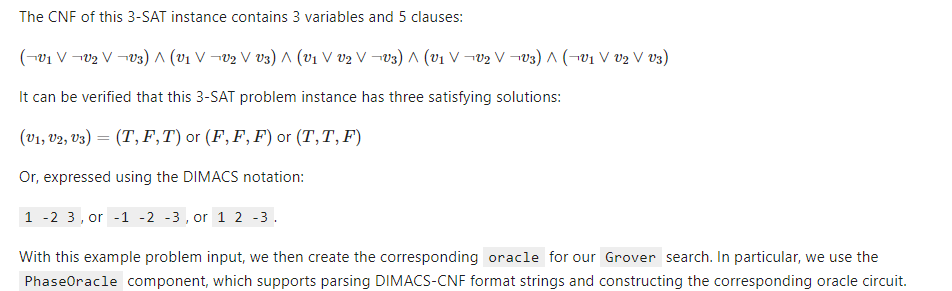

In [ ]:
from qiskit.algorithms import AmplificationProblem

problem = None
if oracle is not None:
    problem = AmplificationProblem(oracle, is_good_state=oracle.evaluate_bitstring)

In [ ]:
print(problem)

None


In [ ]:
from qiskit.algorithms import Grover
from qiskit.primitives import Sampler

grover = Grover(sampler=Sampler())
result = None
if problem is not None:
    result = grover.amplify(problem)
    print(result.assignment)

In [ ]:
from qiskit.tools.visualization import plot_histogram

if result is not None:
    display(plot_histogram(result.circuit_results[0]))

In [ ]:
print(result)

None


In [ ]:
expression = '(w ^ x) & ~(y ^ z) & (x & y & z)'
try:
    oracle = PhaseOracle(expression)
    problem = AmplificationProblem(oracle, is_good_state=oracle.evaluate_bitstring)
    grover = Grover(sampler=Sampler())
    result = grover.amplify(problem)
    display(plot_histogram(result.circuit_results[0]))
except MissingOptionalLibraryError as ex:
    print(ex)

"The 'tweedledum' library is required to use 'PhaseOracle'. You can install it with 'pip install tweedledum'."
